In [34]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy jupyterlab


In [35]:
import pandas as pd

# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/Deepu_K_uvce/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Deepu_K_uvce/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Deepu_K_uvce/Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [36]:
# Merge datasets
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
data = pd.merge(transactions, customers, on='CustomerID', how='inner')
data = pd.merge(data, products, on='ProductID', how='inner')





In [37]:
# Summary statistics
print(data.describe())
print(data.isnull().sum())


                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y  
count  1000.00000  
mean    272.55407  
min      16.08000  
25%     147.95000  
50%     299.93000  
75%     404.40000  
max     497.76000  
std     140.73639  
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue  

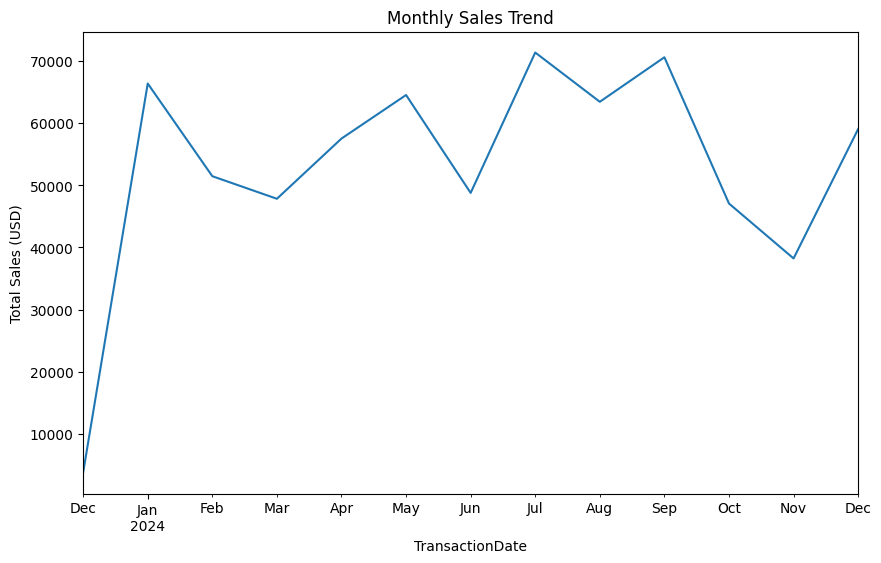

In [38]:
# Sales trend over time
sales_trend = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trend.plot(figsize=(10, 6), title='Monthly Sales Trend', ylabel='Total Sales (USD)')
plt.show()


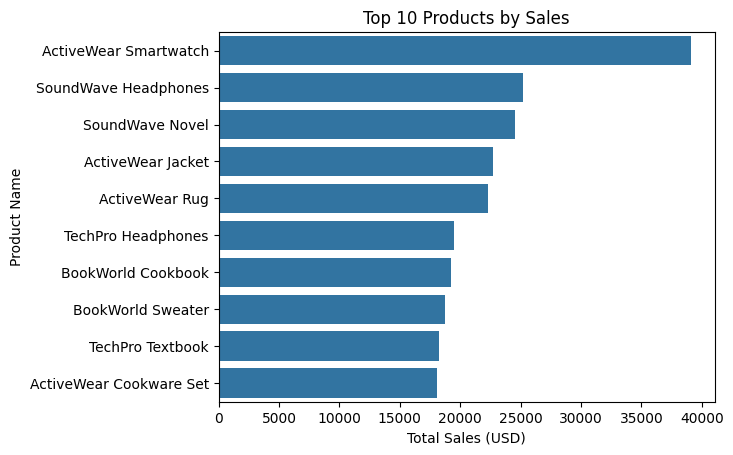

In [41]:
# Top 10 products by sales
import seaborn as sns
import matplotlib.pyplot as plt

product_sales = data.groupby('ProductName')['TotalValue'].sum().nlargest(10)
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()
